


Some of the content from <a href="https://madewithml.com/about/">Made with ML book</a>.


   

# Pandas

In this lesson we will learn the basics of data manipulation using the Pandas library.

* Primary objects in Pandas are DataFrames
* DataFrames are like tables
    * Contain rows and columns of data
    * Columns have names
    * Rows have index values
* Pandas has easy functions for importing and exporting data
    * CSV files
    * Excel spreadsheets
    * SQL queries
    * XML and others

# Set up

In [1]:
#import numpy and pandas libraries
import numpy as np
import pandas as pd

In [2]:
# Set seed for reproducibility
np.random.seed(seed=1234)

# Importing Data from Files

Please download the files in this [link](https://drive.google.com/drive/folders/1jxyf3T-1x-ZH5cfbY9B_l_OPP4cmgNnd?usp=sharing) and upload them to a folder named data in your Colab Notebooks folder in Google Drive to keep them for your future reference

**Alternative method for uploading files:** We will upload the documents to this session by using Files functionality of the Google Colab.

CSV

In [3]:
# This part of code requires you to connect your *entire* google drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# I have the datafile in google drive root/Colab Notebooks/data/test_pandas.csv
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_pandas.csv')
df.head()


,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


In [5]:
df

,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


Opening a file with header set to None

In [6]:
df_no_header = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_pandas_no_header.csv', header=None)
df_no_header

,0,1,2,3,4
0,0,0,1,cat,1.1
1,1,1,2,dog,2.2
2,2,2,3,bird,3.3


EXCEL

In [7]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/test_pandas.xlsm', 'Sheet1')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
df

,Column A,Column B,Column C
0,1,cat,1.1
1,2,dog,2.2
2,3,bird,3.3


# Load data

We're going to work with the [Titanic dataset](https://www.kaggle.com/c/titanic/data) which has data on the people who embarked the RMS Titanic in 1912 and whether they survived the expedition or not. It's a very common and rich dataset which makes it very apt for exploratory data analysis with Pandas.

Let's load the data from the CSV file into a Pandas dataframe. The `header=0` signifies that the first row (0th index) is a header row which contains the names of each column in our dataset.

In [9]:
#change your directory to your Colab Notebooks which contains titanic.csv
%cd "/content/drive/My Drive/Colab Notebooks/data"

/content/drive/My Drive/Colab Notebooks/data


In [10]:
!pwd

/content/drive/My Drive/Colab Notebooks/data


In [11]:
#run the pwd=print working directory command to see which directory you are at
!pwd

/content/drive/My Drive/Colab Notebooks/data


In [12]:
ls

test_pandas.csv  test_pandas_no_header.csv  test_pandas.xlsm  train.csv


In [13]:
# read the CSV file
import pandas as pd
df=pd.read_csv('train.csv')

In [14]:
# First five items
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


These are the different features:
* `class`: class of travel
* `name`: full name of the passenger
* `sex`: gender
* `age`: numerical age
* `sibsp`: # of siblings/spouse aboard
* `parch`: number of parents/child aboard
* `ticket`: ticket number
* `fare`: cost of the ticket
* `cabin`: location of room
* `emarked`: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q - Queenstown)
* `survived`: survial metric (0 - died, 1 - survived)

# Exploratory data analysis (EDA)

Now that we loaded our data, we're ready to start exploring it to find interesting information.



In [16]:
import matplotlib.pyplot as plt

We can select columns with basic indexing.

Selecting a single column:

In [17]:
df[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Selecting multiple columns:

In [18]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


We can select rows with slicing.

In [19]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


We can use `.describe()` to extract some standard details about our numerical features.

In [20]:
# Describe features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.sample()  # Return a random sample.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C


In [22]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.info() # pay attention to the Dtype, if it's "object", this is a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# Correlation matrix
df.corr()

<ipython-input-26-4ac365e90132>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We can also use `.hist()` to view the histrogram of values for each feature.

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

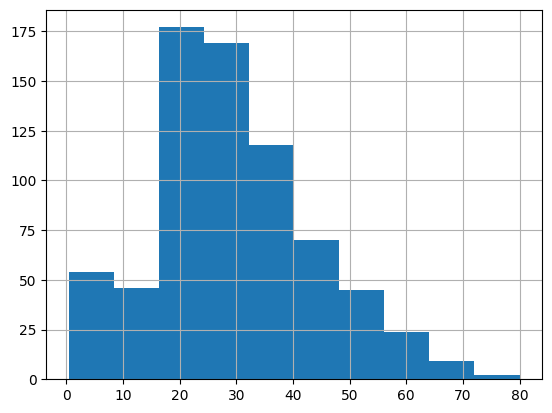

In [28]:
# Histograms
df["Age"].hist()

In [29]:
# Unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)




# Pandas Profiling

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8a93f6468f2627f41e9a9225835a815857127aee53be78fe3a8dd8f104f0ad97
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.3.0
    Uninstalling pydantic-2.

In [ ]:
from pandas_profiling import ProfileReport


<ipython-input-22-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile = df.profile_report()

In [ ]:
df.profile_report()
profile.to_file("titanic.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <s>Filtering</s> Masking (Boolean indexing)

When you want to select rows based on a certain condition like a where clause in SQL, boolean masks can be used.

In [30]:
df['Fare'] > 20

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888     True
889     True
890    False
Name: Fare, Length: 891, dtype: bool

In [ ]:
df[df['Fare'] > 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# Selecting data by feature
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
df.Sex[df.Sex=='male'].count()

577

In [ ]:
# Filtering
df[df["Sex"]=="female"].head() # only the female data appear

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C






#### <font color="green">**Exercise 1: Select all passengers that are male.**</font>

In [ ]:
df_male = df[df.Sex=='male']
df_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_male.count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

What does the code below do?

In [ ]:
male_survivor_mask = (df.Sex=='male') & (df.Age>=18)

Men who survived and who are older than 18

In [ ]:
male_survivor_mask

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Length: 891, dtype: bool

In [ ]:
df[male_survivor_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Sorting

In [ ]:
# Sorting
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


# <font color="green"> **Exercise 2**

In [ ]:
# Exercise 2 - how do you find passengers who paid the highest "Fare"? - find the top 10
sorted_data = df.sort_values(by='Fare', ascending=False).head(10)
sorted_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


# Grouping

In [31]:
# Grouping
survived_group = df.groupby("Survived")
survived_group.mean()

<ipython-input-31-7f4b660a060e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_group.mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Calculate the average survival ratio for all passengers.

In [32]:
df['Survived'].mean()

0.3838383838383838

Calculate the average survival ratio for female and male.

In [33]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


# <font color="green"> **Exercise 3**

#### <font color="green">Exercise 3: Calculate the average age of male passengers.</font>





30.72664459161148


Calculate the average age of female passengers.



In [38]:
df['Age'].mean()

28.765622895622894

# Indexing

We can use `iloc` to get rows or columns at particular positions in the dataframe.

In [ ]:
# Selecting all columns of row 0
df.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [ ]:
# Selecting a specific value
df.iloc[0, 1]

0

# Missing Value Imputation

There are various ways we can imputate the missing values. We can replace the missing/null values with either of 3 M’s (Mean/ Mode/ Median) depending on the possible values of the given column, or simply drop the missing values. We can also fill in missing values using prediction model (such as regression).

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Age**

In [40]:
df['Age']  = df['Age'].fillna(28)

In [39]:
df['Age'].fillna(28)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**Missing Embarked**

In [41]:
df.Embarked.value_counts() # remember there are two NANs in the Embarked column. But when you do value_counts(), they do not show below
                           # the majority of the passengers embarked at "S".

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
df['Embarked']=df['Embarked'].fillna("S")

In [ ]:
#df['Embarked']=df['Embarked'].fillna(df.Embarked.mode())  # .mode() will provide the majority of the value in a column.

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We can drop missing values as well please see the examples below.

# Preprocessing

After exploring, we can clean and preprocess our dataset.


In [45]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [46]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [47]:
# Dropping multiple columns
df = df.drop(["Name", "Cabin", "Ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [48]:
df = df.rename(columns={"index":"original_index"}) # change the column name - index to original index
df.head()

,original_index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [49]:
# Map feature values - most of ML models do not like categorical features
df["Sex"] = df["Sex"].map( {"female": 0, "male": 1} ).astype(int)
df["Embarked"] = df["Embarked"].dropna().map( {"S":0, "C":1, "Q":2} ).astype(int)
df.head()

,original_index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,0,38.0,1,0,71.2833,1
1,3,4,1,1,0,35.0,1,0,53.1000,0
2,6,7,0,1,1,54.0,0,0,51.8625,0
3,10,11,1,3,0,4.0,1,1,16.7000,0
4,11,12,1,1,0,58.0,0,0,26.5500,0


# Feature engineering

We're now going to use feature engineering to create a column called `family_size`. We'll first define a function called `get_family_size` that will determine the family size using the number of parents and siblings.

In [50]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

Once we define the function, we can use `lambda` to `apply` that function on each row (using the numbers of siblings and parents in each row to determine the family size for each row).

In [51]:
df["family_size"] = df[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
df.head()

,original_index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,1,2,1,1,0,38.0,1,0,71.2833,1,1
1,3,4,1,1,0,35.0,1,0,53.1000,0,1
2,6,7,0,1,1,54.0,0,0,51.8625,0,0
3,10,11,1,3,0,4.0,1,1,16.7000,0,2
4,11,12,1,1,0,58.0,0,0,26.5500,0,0


In [52]:
# Reorganize headers
df = df[["original_index","Pclass", "Sex", "Age", "SibSp", "Parch", "family_size", "Fare", "Embarked", "Survived"]]
df.head()

,original_index,Pclass,Sex,Age,SibSp,Parch,family_size,Fare,Embarked,Survived
0,1,1,0,38.0,1,0,1,71.2833,1,1
1,3,1,0,35.0,1,0,1,53.1000,0,1
2,6,1,1,54.0,0,0,0,51.8625,0,0
3,10,3,0,4.0,1,1,2,16.7000,0,1
4,11,1,0,58.0,0,0,0,26.5500,0,1


# Save data

Finally, let's save our preprocessed data into a new CSV file to use later.

In [53]:
!pwd

/content/drive/MyDrive/Colab Notebooks/data


In [54]:
# Saving dataframe to CSV
df.to_csv("processed_titanic.csv", index=False)

In [55]:
# See the saved file
!ls -l

total 3519
-rw------- 1 root root    6060 Sep 12 20:29 processed_titanic.csv
-rw------- 1 root root      40 Feb 17  2018 test_pandas.csv
-rw------- 1 root root      43 Sep  7  2019 test_pandas_no_header.csv
-rw------- 1 root root   30093 Feb 17  2018 test_pandas.xlsm
-rw------- 1 root root 3502935 Sep 12 20:04 titanic.html
-rw------- 1 root root   62086 Feb 17  2018 train.csv


## Remember to turn in your file to "105 Pandas" assignment.

There are three exercises in this file.